<a href="https://colab.research.google.com/github/Davron030901/Machine_Learning/blob/main/My_first_project_for_Sales_with_logistic_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Datani yuklash

In [2]:
!wget https://raw.githubusercontent.com/Davron030901/Scikit_learning/main/data/Sales.csv

--2024-12-21 10:33:44--  https://raw.githubusercontent.com/Davron030901/Scikit_learning/main/data/Sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15240282 (15M) [text/plain]
Saving to: ‘Sales.csv’

Sales.csv           100%[===================>]  14.53M  28.0MB/s    in 0.5s    

2024-12-21 10:33:48 (28.0 MB/s) - ‘Sales.csv’ saved [15240282/15240282]



In [3]:
df=pd.read_csv('Sales.csv')

In [4]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26/11/2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26/11/2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23/03/2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23/03/2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15/05/2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


#Data ma'lumotlarini ko'rish

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

#Ortiqcha ustunlarni O'chirish

In [6]:
df = df.drop(columns=['Date', 'Age_Group','Product','Cost','Revenue'])

In [7]:
df.head()

,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit
0,26,November,2013,19,M,Canada,British Columbia,Accessories,Bike Racks,8,45,120,590
1,26,November,2015,19,M,Canada,British Columbia,Accessories,Bike Racks,8,45,120,590
2,23,March,2014,49,M,Australia,New South Wales,Accessories,Bike Racks,23,45,120,1366
3,23,March,2016,49,M,Australia,New South Wales,Accessories,Bike Racks,20,45,120,1188
4,15,May,2014,47,F,Australia,New South Wales,Accessories,Bike Racks,4,45,120,238


#NaN qiymatlarni tekshirish


In [8]:
df.isnull().sum()

,0
Day,0
Month,0
Year,0
Customer_Age,0
Customer_Gender,0
Country,0
State,0
Product_Category,0
Sub_Category,0
Order_Quantity,0


#Dublikatlarni o'chirish

In [9]:
df.drop_duplicates(inplace=True,ignore_index=True)

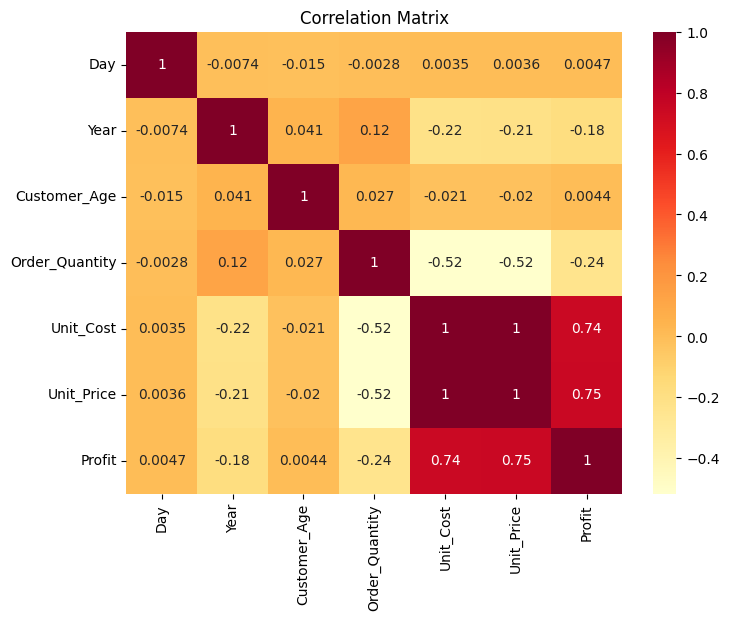

In [10]:
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]

# Calculate the correlation matrix and create the heatmap
corr_matrix = df_numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()

In [11]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder
ode = OrdinalEncoder(dtype=np.int8)
ohe=OneHotEncoder(handle_unknown='ignore',sparse_output=False,dtype=np.int8)

In [12]:
df

,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit
0,26,November,2013,19,M,Canada,British Columbia,Accessories,Bike Racks,8,45,120,590
1,26,November,2015,19,M,Canada,British Columbia,Accessories,Bike Racks,8,45,120,590
2,23,March,2014,49,M,Australia,New South Wales,Accessories,Bike Racks,23,45,120,1366
3,23,March,2016,49,M,Australia,New South Wales,Accessories,Bike Racks,20,45,120,1188
4,15,May,2014,47,F,Australia,New South Wales,Accessories,Bike Racks,4,45,120,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112031,12,April,2016,41,M,United Kingdom,England,Clothing,Vests,3,24,64,112
112032,2,April,2014,18,M,Australia,Queensland,Clothing,Vests,22,24,64,655
112033,2,April,2016,18,M,Australia,Queensland,Clothing,Vests,22,24,64,655
112034,4,March,2014,37,F,France,Seine (Paris),Clothing,Vests,24,24,64,684


In [13]:
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (ohe, ['Country', 'State', 'Product_Category']),
    (ode, ['Month','Customer_Gender', 'Sub_Category']),
    remainder='passthrough'
)

ct = ct.set_output(transform='pandas')

df = ct.fit_transform(df)

In [14]:
df.columns

Index(['onehotencoder__Country_Australia', 'onehotencoder__Country_Canada',
       'onehotencoder__Country_France', 'onehotencoder__Country_Germany',
       'onehotencoder__Country_United Kingdom',
       'onehotencoder__Country_United States', 'onehotencoder__State_Alabama',
       'onehotencoder__State_Alberta', 'onehotencoder__State_Arizona',
       'onehotencoder__State_Bayern', 'onehotencoder__State_Brandenburg',
       'onehotencoder__State_British Columbia',
       'onehotencoder__State_California',
       'onehotencoder__State_Charente-Maritime',
       'onehotencoder__State_England', 'onehotencoder__State_Essonne',
       'onehotencoder__State_Florida', 'onehotencoder__State_Garonne (Haute)',
       'onehotencoder__State_Georgia', 'onehotencoder__State_Hamburg',
       'onehotencoder__State_Hauts de Seine', 'onehotencoder__State_Hessen',
       'onehotencoder__State_Illinois', 'onehotencoder__State_Kentucky',
       'onehotencoder__State_Loir et Cher', 'onehotencoder__State_Lo

#Datani input va outputga ajratish

In [15]:
X = df.drop(columns='ordinalencoder__Sub_Category',axis=1)
y = df['ordinalencoder__Sub_Category']

#Train va testga ajratish

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.metrics import classification_report,r2_score

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(penalty='l2', C=1.0,solver='lbfgs', max_iter=1000)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [19]:
y_pred=lr.predict(X_test_scaled)
r2_score(y_test,y_pred)

-0.36187938437078704

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.54      0.62       125
           1       0.75      0.55      0.64       100
           2       0.41      0.01      0.01      3166
           3       0.91      0.98      0.94       860
           4       0.00      0.00      0.00       342
           5       0.00      0.00      0.00       780
           6       0.91      0.97      0.94       543
           7       0.72      0.92      0.81      2484
           8       0.90      0.51      0.65       267
           9       0.97      1.00      0.99      1213
          10       1.00      1.00      1.00      1786
          11       0.80      0.98      0.88      2636
          12       0.74      0.88      0.81       377
          13       1.00      0.58      0.73       228
          14       0.57      0.89      0.70      6644
          15       0.38      0.04      0.07       691
          16       0.64      0.25      0.36       166

    accuracy              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(r2_score(y_test,y_pred))

0.8887316688542017


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       100
           2       0.95      0.95      0.95      3166
           3       1.00      1.00      1.00       860
           4       1.00      1.00      1.00       342
           5       1.00      1.00      1.00       780
           6       1.00      1.00      1.00       543
           7       0.98      0.98      0.98      2484
           8       1.00      1.00      1.00       267
           9       1.00      1.00      1.00      1213
          10       1.00      1.00      1.00      1786
          11       1.00      1.00      1.00      2636
          12       1.00      1.00      1.00       377
          13       1.00      1.00      1.00       228
          14       0.97      0.97      0.97      6644
          15       1.00      1.00      1.00       691
          16       1.00      1.00      1.00       166

    accuracy              

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(r2_score(y_test,y_pred))

0.6941351057461203


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       100
           2       0.86      0.86      0.86      3166
           3       1.00      1.00      1.00       860
           4       1.00      1.00      1.00       342
           5       1.00      1.00      1.00       780
           6       1.00      1.00      1.00       543
           7       0.92      0.99      0.95      2484
           8       1.00      1.00      1.00       267
           9       1.00      1.00      1.00      1213
          10       1.00      1.00      1.00      1786
          11       1.00      1.00      1.00      2636
          12       1.00      1.00      1.00       377
          13       1.00      1.00      1.00       228
          14       0.93      0.90      0.91      6644
          15       1.00      0.99      1.00       691
          16       1.00      1.00      1.00       166

    accuracy              

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print(r2_score(y_test,y_pred))

0.4813299191509599


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       100
           2       0.75      0.78      0.76      3166
           3       1.00      1.00      1.00       860
           4       1.00      1.00      1.00       342
           5       1.00      1.00      1.00       780
           6       1.00      1.00      1.00       543
           7       0.88      1.00      0.94      2484
           8       1.00      1.00      1.00       267
           9       1.00      1.00      1.00      1213
          10       1.00      1.00      1.00      1786
          11       1.00      1.00      1.00      2636
          12       1.00      1.00      1.00       377
          13       1.00      1.00      1.00       228
          14       0.89      0.83      0.86      6644
          15       1.00      1.00      1.00       691
          16       1.00      1.00      1.00       166

    accuracy              

In [27]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
print(r2_score(y_test,y_pred))

-0.46780748585111454


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       125
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00      3166
           3       0.00      0.00      0.00       860
           4       0.00      0.00      0.00       342
           5       0.00      0.00      0.00       780
           6       0.00      0.00      0.00       543
           7       0.75      1.00      0.86      2484
           8       0.00      0.00      0.00       267
           9       0.38      1.00      0.55      1213
          10       0.00      0.00      0.00      1786
          11       0.52      1.00      0.68      2636
          12       0.00      0.00      0.00       377
          13       0.00      0.00      0.00       228
          14       0.59      0.95      0.73      6644
          15       0.00      0.00      0.00       691
          16       0.00      0.00      0.00       166

    accuracy              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)
print(r2_score(y_test,y_pred))

0.6185063822073154


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       100
           2       0.84      0.81      0.82      3166
           3       1.00      1.00      1.00       860
           4       1.00      0.99      0.99       342
           5       1.00      1.00      1.00       780
           6       1.00      1.00      1.00       543
           7       0.91      0.98      0.94      2484
           8       1.00      1.00      1.00       267
           9       1.00      1.00      1.00      1213
          10       1.00      1.00      1.00      1786
          11       1.00      1.00      1.00      2636
          12       1.00      1.00      1.00       377
          13       1.00      1.00      1.00       228
          14       0.90      0.89      0.89      6644
          15       1.00      1.00      1.00       691
          16       1.00      1.00      1.00       166

    accuracy              

In [31]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
print(r2_score(y_test,y_pred))

0.8935490788321441


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       100
           2       0.95      0.95      0.95      3166
           3       1.00      1.00      1.00       860
           4       1.00      1.00      1.00       342
           5       1.00      1.00      1.00       780
           6       1.00      1.00      1.00       543
           7       0.97      0.98      0.98      2484
           8       1.00      1.00      1.00       267
           9       1.00      1.00      1.00      1213
          10       1.00      1.00      1.00      1786
          11       1.00      1.00      1.00      2636
          12       1.00      1.00      1.00       377
          13       1.00      1.00      1.00       228
          14       0.97      0.97      0.97      6644
          15       1.00      1.00      1.00       691
          16       1.00      1.00      1.00       166

    accuracy              

In [33]:
!pip install xgboost

In [34]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(r2_score(y_test,y_pred))

0.6859918596046555


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       100
           2       0.86      0.85      0.85      3166
           3       1.00      1.00      1.00       860
           4       1.00      1.00      1.00       342
           5       1.00      1.00      1.00       780
           6       1.00      1.00      1.00       543
           7       0.94      0.98      0.96      2484
           8       1.00      1.00      1.00       267
           9       1.00      1.00      1.00      1213
          10       1.00      1.00      1.00      1786
          11       1.00      1.00      1.00      2636
          12       1.00      1.00      1.00       377
          13       1.00      1.00      1.00       228
          14       0.92      0.91      0.92      6644
          15       1.00      1.00      1.00       691
          16       1.00      1.00      1.00       166

    accuracy              

In [36]:
!pip install lightgbm

In [37]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
print(r2_score(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 574
[LightGBM] [Info] Number of data points in the train set: 89628, number of used features: 54
[LightGBM] [Info] Start training from score -5.257094
[LightGBM] [Info] Start training from score -5.531305
[LightGBM] [Info] Start training from score -1.971300
[LightGBM] [Info] Start training from score -3.243476
[LightGBM] [Info] Start training from score -4.117231
[LightGBM] [Info] Start training from score -3.316398
[LightGBM] [Info] Start training from score -3.733461
[LightGBM] [Info] Start training from score -2.227053
[LightGBM] [Info] Start training from score -4.430817
[LightGBM] [Info] Start training from score -2.928511
[LightGBM] [Info] Start training from score -2.547332
[LightGBM] [Info] Start training from 

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       100
           2       0.88      0.85      0.86      3166
           3       1.00      1.00      1.00       860
           4       1.00      1.00      1.00       342
           5       1.00      1.00      1.00       780
           6       1.00      1.00      1.00       543
           7       0.96      0.98      0.97      2484
           8       1.00      1.00      1.00       267
           9       1.00      1.00      1.00      1213
          10       1.00      1.00      1.00      1786
          11       1.00      1.00      1.00      2636
          12       1.00      1.00      1.00       377
          13       1.00      1.00      1.00       228
          14       0.92      0.93      0.93      6644
          15       1.00      1.00      1.00       691
          16       1.00      1.00      1.00       166

    accuracy              

In [39]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [40]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)
print(r2_score(y_test,y_pred))

Learning rate set to 0.099517
0:	learn: 1.9528681	total: 339ms	remaining: 5m 39s
1:	learn: 1.6711674	total: 607ms	remaining: 5m 3s
2:	learn: 1.4848377	total: 920ms	remaining: 5m 5s
3:	learn: 1.3278716	total: 1.38s	remaining: 5m 44s
4:	learn: 1.2117711	total: 1.95s	remaining: 6m 27s
5:	learn: 1.0985693	total: 2.48s	remaining: 6m 50s
6:	learn: 1.0191139	total: 3.09s	remaining: 7m 18s
7:	learn: 0.9388080	total: 3.63s	remaining: 7m 29s
8:	learn: 0.8741785	total: 4.32s	remaining: 7m 55s
9:	learn: 0.8116246	total: 4.86s	remaining: 8m 1s
10:	learn: 0.7652148	total: 5.35s	remaining: 8m
11:	learn: 0.7262361	total: 5.84s	remaining: 8m
12:	learn: 0.6844826	total: 6.29s	remaining: 7m 57s
13:	learn: 0.6488191	total: 6.84s	remaining: 8m 1s
14:	learn: 0.6209286	total: 7.47s	remaining: 8m 10s
15:	learn: 0.5929008	total: 7.94s	remaining: 8m 8s
16:	learn: 0.5722756	total: 8.45s	remaining: 8m 8s
17:	learn: 0.5473170	total: 8.96s	remaining: 8m 8s
18:	learn: 0.5293197	total: 9.59s	remaining: 8m 14s
19:	lea

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       100
           2       0.85      0.84      0.85      3166
           3       1.00      1.00      1.00       860
           4       1.00      1.00      1.00       342
           5       1.00      1.00      1.00       780
           6       1.00      1.00      1.00       543
           7       0.93      0.99      0.95      2484
           8       1.00      1.00      1.00       267
           9       1.00      1.00      1.00      1213
          10       1.00      1.00      1.00      1786
          11       1.00      1.00      1.00      2636
          12       1.00      1.00      1.00       377
          13       1.00      1.00      1.00       228
          14       0.92      0.90      0.91      6644
          15       1.00      1.00      1.00       691
          16       1.00      1.00      1.00       166

    accuracy              

In [42]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(r2_score(y_test,y_pred))

-0.6511809994483397


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       125
           1       1.00      0.76      0.86       100
           2       0.00      0.00      0.00      3166
           3       0.00      0.00      0.00       860
           4       0.00      0.00      0.00       342
           5       0.00      0.00      0.00       780
           6       0.00      0.00      0.00       543
           7       0.48      0.91      0.63      2484
           8       0.00      0.00      0.00       267
           9       0.81      1.00      0.90      1213
          10       1.00      1.00      1.00      1786
          11       0.79      1.00      0.88      2636
          12       0.50      0.36      0.42       377
          13       0.00      0.00      0.00       228
          14       0.50      0.81      0.62      6644
          15       0.00      0.00      0.00       691
          16       1.00      0.01      0.01       166

    accuracy              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(r2_score(y_test,y_pred))

0.11548574444211535


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       125
           1       1.00      0.99      0.99       100
           2       0.61      0.63      0.62      3166
           3       1.00      1.00      1.00       860
           4       0.55      0.28      0.37       342
           5       0.50      0.74      0.60       780
           6       0.47      0.38      0.42       543
           7       0.80      0.94      0.87      2484
           8       0.97      0.95      0.96       267
           9       1.00      1.00      1.00      1213
          10       1.00      1.00      1.00      1786
          11       1.00      1.00      1.00      2636
          12       0.84      0.93      0.88       377
          13       0.55      0.14      0.22       228
          14       0.76      0.71      0.73      6644
          15       1.00      1.00      1.00       691
          16       0.70      0.54      0.61       166

    accuracy              

In [46]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print(r2_score(y_test,y_pred))

0.16982823784582612


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       125
           1       1.00      0.99      0.99       100
           2       0.96      0.22      0.36      3166
           3       0.99      1.00      1.00       860
           4       0.55      0.94      0.69       342
           5       0.63      1.00      0.78       780
           6       1.00      1.00      1.00       543
           7       0.87      1.00      0.93      2484
           8       1.00      1.00      1.00       267
           9       1.00      1.00      1.00      1213
          10       1.00      1.00      1.00      1786
          11       0.93      0.95      0.94      2636
          12       1.00      0.98      0.99       377
          13       1.00      0.97      0.98       228
          14       0.73      0.88      0.79      6644
          15       0.80      0.71      0.75       691
          16       0.97      1.00      0.98       166

    accuracy              

In [50]:
estimators=[('lr', lr),
            ('dtc', dtc),
            ('rfc', rfc),
            ('gbc', gbc),
            ('abc', abc),
            ('etc', etc),
            ('bc', bc),
            ('knn', knn),
            ('mlp', mlp)]

In [51]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=estimators, voting='soft')
vc.fit(X_train_scaled, y_train)
y_pred = vc.predict(X_test_scaled)
print(r2_score(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8628477008787824


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       100
           2       0.96      0.92      0.94      3166
           3       1.00      1.00      1.00       860
           4       1.00      1.00      1.00       342
           5       1.00      1.00      1.00       780
           6       1.00      1.00      1.00       543
           7       0.94      0.99      0.96      2484
           8       1.00      1.00      1.00       267
           9       1.00      1.00      1.00      1213
          10       1.00      1.00      1.00      1786
          11       1.00      1.00      1.00      2636
          12       1.00      1.00      1.00       377
          13       1.00      1.00      1.00       228
          14       0.96      0.96      0.96      6644
          15       1.00      1.00      1.00       691
          16       1.00      1.00      1.00       166

    accuracy              

In [53]:
from sklearn.ensemble import StackingClassifier
sc = StackingClassifier(estimators=estimators, final_estimator=lr)
sc.fit(X_train_scaled, y_train)
y_pred = sc.predict(X_test_scaled)
print(r2_score(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

0.900743341339103


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       100
           2       0.96      0.96      0.96      3166
           3       1.00      1.00      1.00       860
           4       1.00      1.00      1.00       342
           5       1.00      1.00      1.00       780
           6       1.00      1.00      1.00       543
           7       0.97      0.98      0.98      2484
           8       1.00      1.00      1.00       267
           9       1.00      1.00      1.00      1213
          10       1.00      1.00      1.00      1786
          11       1.00      1.00      1.00      2636
          12       1.00      1.00      1.00       377
          13       1.00      1.00      1.00       228
          14       0.97      0.97      0.97      6644
          15       1.00      1.00      1.00       691
          16       1.00      1.00      1.00       166

    accuracy              